AWS/GCP/Azure — These providers expose the official cloud service assets that you would be using for any diagram that leverages one of the main cloud providers.

In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2
packages = !conda list
packages

['# packages in environment at /opt/conda:',
 '#',
 '# Name                    Version                   Build  Channel',
 '_libgcc_mutex             0.1                 conda_forge    conda-forge',
 '_openmp_mutex             4.5                       0_gnu    conda-forge',
 'alembic                   1.4.2              pyh9f0ad1d_0    conda-forge',
 'argon2-cffi               20.1.0                   pypi_0    pypi',
 'async_generator           1.10                       py_0    conda-forge',
 'attrs                     19.3.0                     py_0    conda-forge',
 'backcall                  0.1.0                      py_0    conda-forge',
 'bleach                    3.1.5              pyh9f0ad1d_0    conda-forge',
 'blinker                   1.4                        py_1    conda-forge',
 'brotlipy                  0.7.0           py37h8f50634_1000    conda-forge',
 'ca-certificates           2020.4.5.1           hecc5488_0    conda-forge',
 'certifi                   2020.6.2

// The Round Table
digraph {
}
// The Round Table
digraph {
	A [label="King Arthur"]
	B [label="Sir Bedevere the Wise"]
	L [label="Sir Lancelot the Brave"]
	A -> B
	A -> L
	B -> L [constraint=false]
}


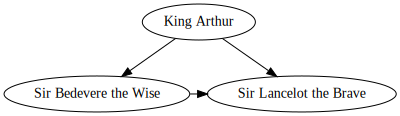

In [2]:
from graphviz import Digraph

dot = Digraph(comment='The Round Table')

print(dot)
dot.node('A', 'King Arthur')
dot.node('B', 'Sir Bedevere the Wise')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false')
print(dot.source) 
dot.render('test-output/round-table.jpg', view=True)
dot

In [3]:
from diagrams import Diagram, Cluster

## Excercise 3-8 Architecture

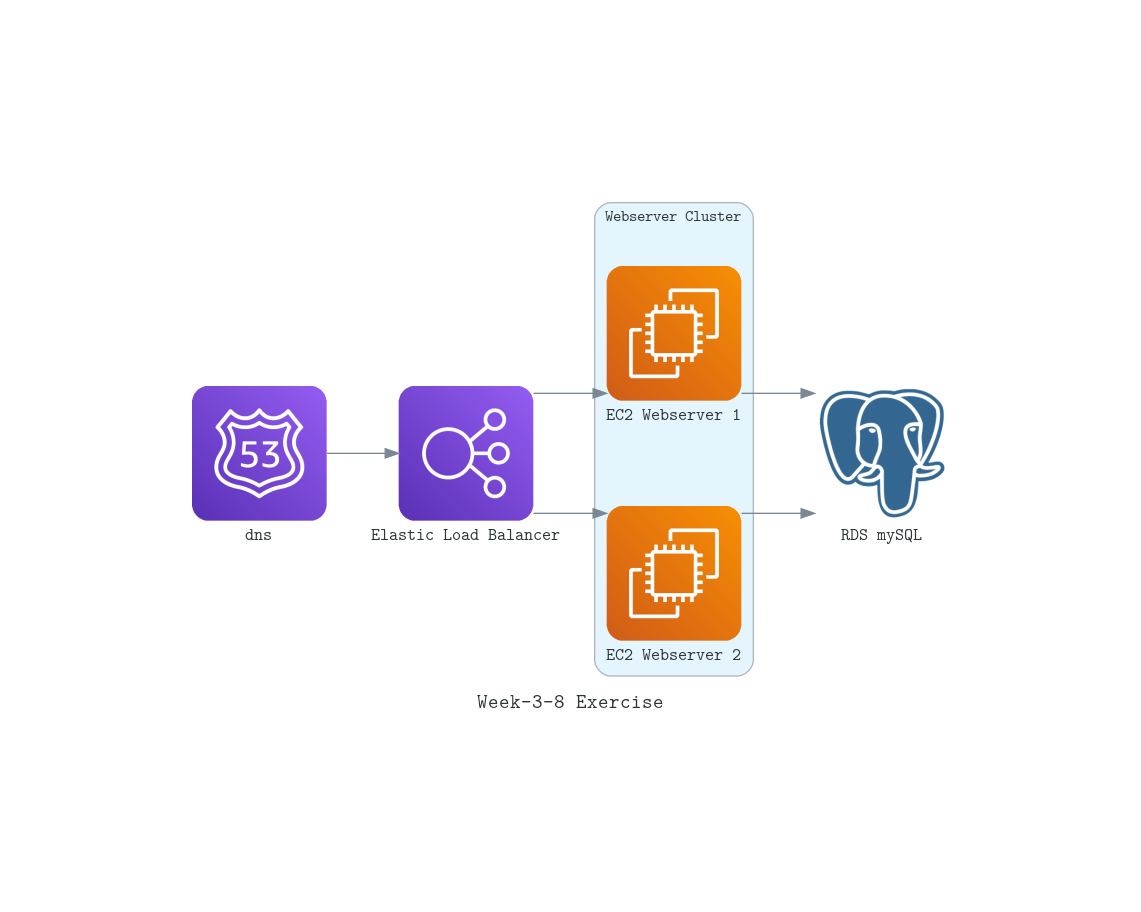

In [4]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53
from diagrams.onprem.database import PostgreSQL # Would typically use RDS from aws.database
from diagrams.onprem.inmemory import Redis # Would typically use ElastiCache from aws.database
from diagrams.aws.ml import Rekognition

with Diagram("Week-3-8 Exercise", direction='LR') as diag: # It's LR by default, but you have a few options with the orientation
    dns = Route53("dns")
    load_balancer = ELB("Elastic Load Balancer")
    database = PostgreSQL("RDS mySQL")
#    cache = Redis("Cache")
    with Cluster("Webserver Cluster"):
        svc_group = [EC2("EC2 Webserver 1"),
                    EC2("EC2 Webserver 2")]
    dns >> load_balancer >> svc_group
#    svc_group >> cache
    svc_group >> database
diag # This will illustrate the diagram if you are using a Google Colab or Jypiter notebook.

## big AWS architecture

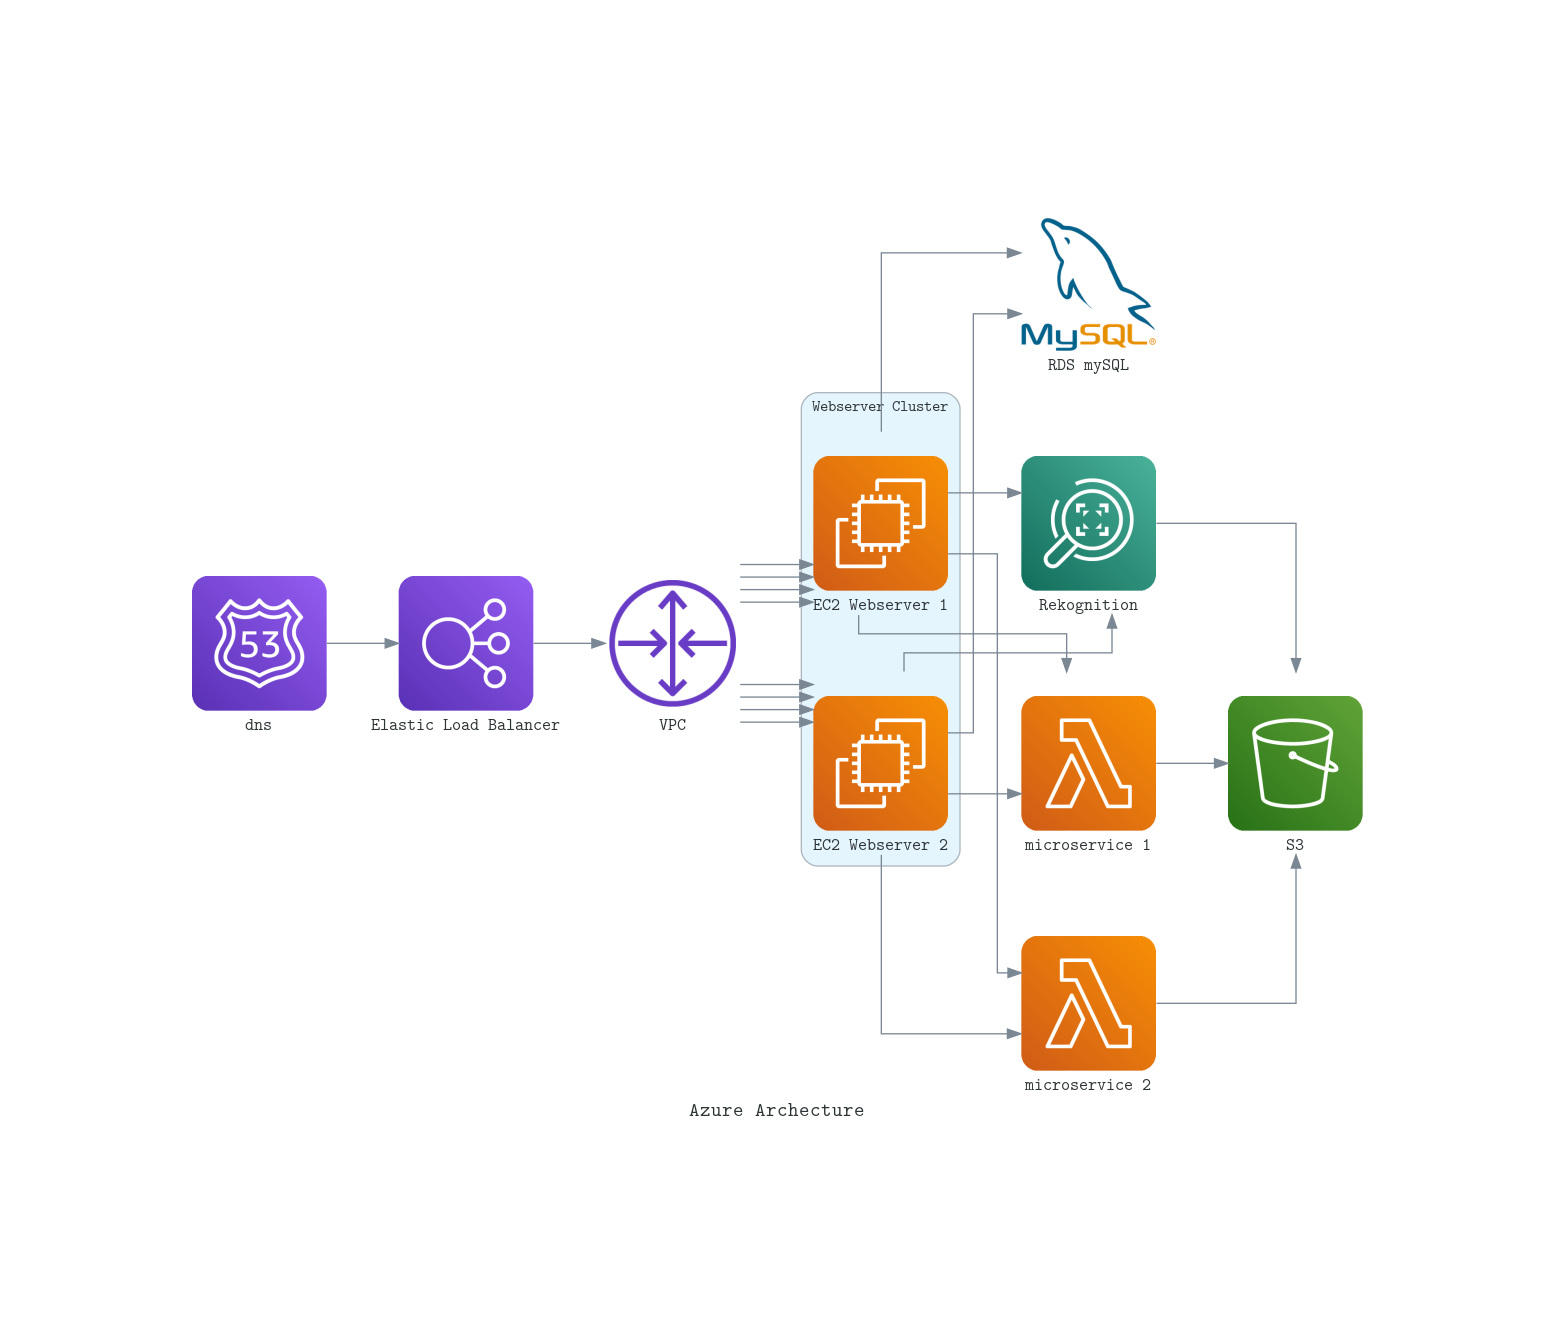

In [31]:
from diagrams import Diagram, Cluster
from diagrams.aws.compute import EC2
from diagrams.aws.network import ELB
from diagrams.aws.network import Route53
from diagrams.onprem.database import Mysql 
from diagrams.aws.compute import Lambda
from diagrams.aws.storage import SimpleStorageServiceS3
from diagrams.aws.network import VPCRouter
from diagrams.aws.ml import Rekognition

with Diagram("Azure Archecture", direction='LR') as diag: 
    dns = Route53("dns")
    vpc = VPCRouter("VPC")
    load_balancer = ELB("Elastic Load Balancer")
    database = Mysql("RDS mySQL")
    lambda1 = Lambda("microservice 1")
    lambda2 = Lambda("microservice 2")
    rek = Rekognition("Rekognition")
    s3 = SimpleStorageServiceS3("S3")
    with Cluster("Webserver Cluster"):
        svc_group = [EC2("EC2 Webserver 1"),
                    EC2("EC2 Webserver 2")]
    dns >> load_balancer >> vpc
    vpc >> svc_group >> database
    vpc >> svc_group >> lambda1
    lambda1 >> s3
    vpc >> svc_group >> lambda2
    lambda2 >> s3
    vpc >> svc_group >> rek
    rek >> s3
diag 

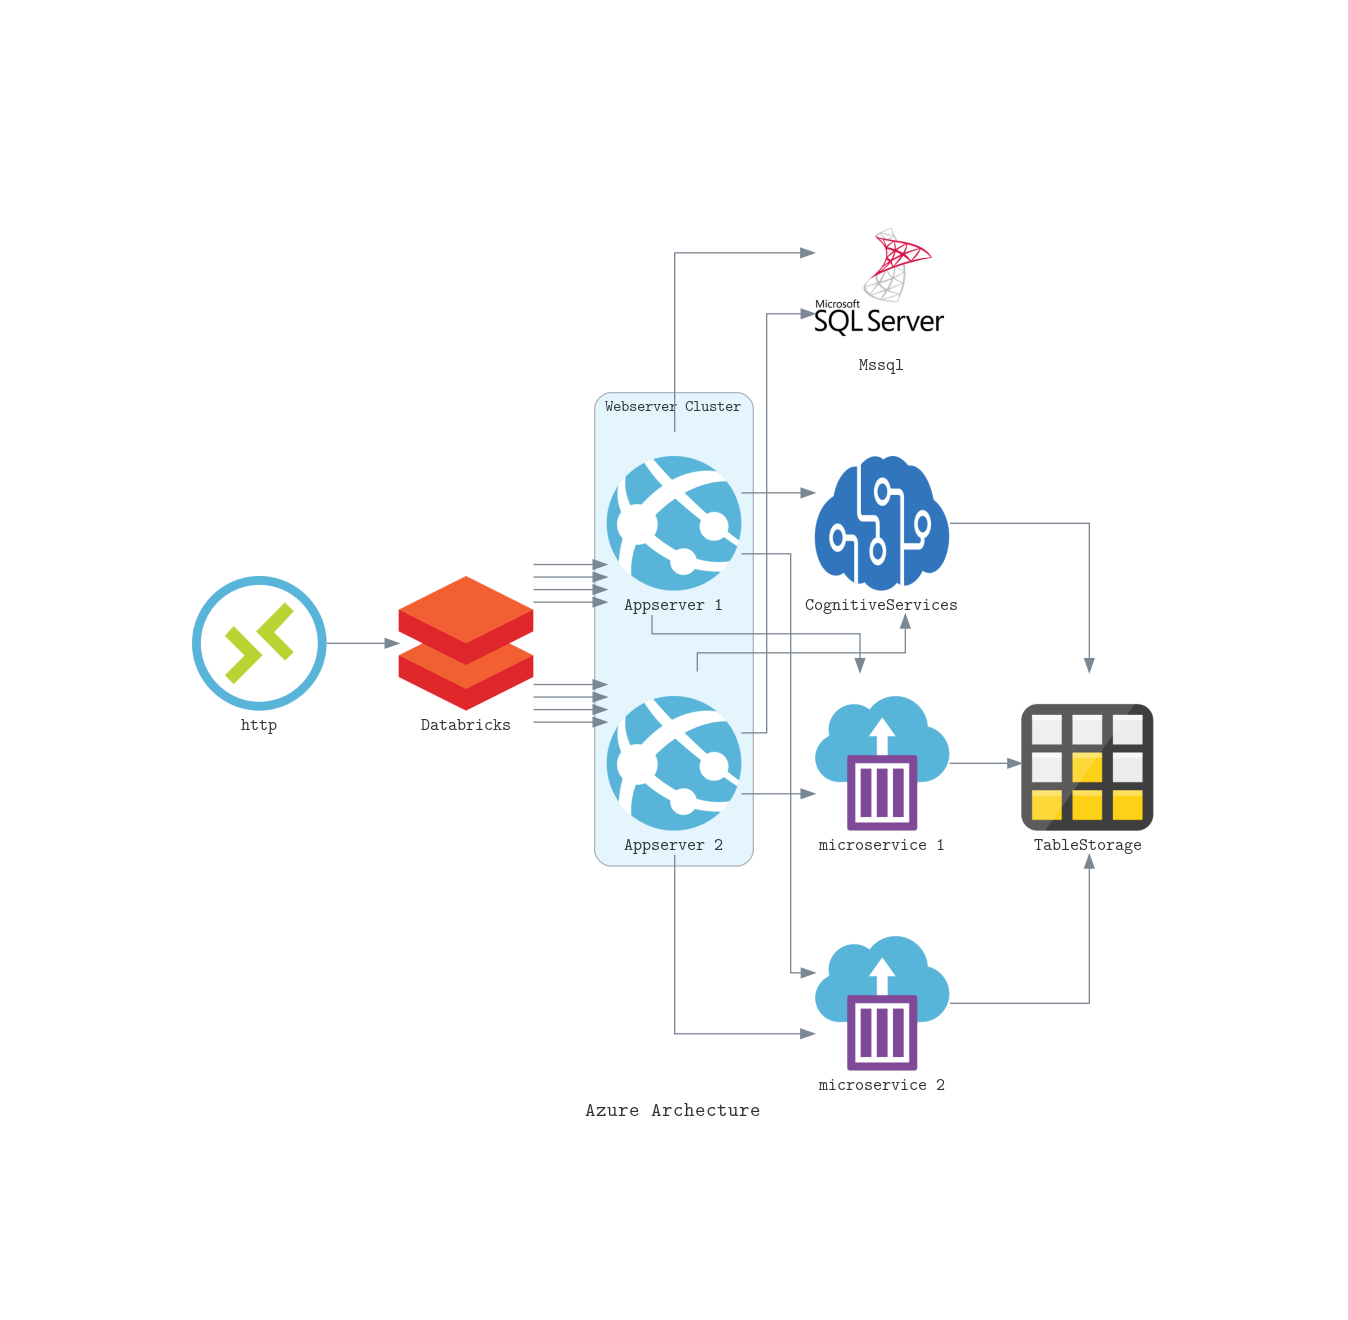

In [42]:
from diagrams import Diagram, Cluster
from diagrams.azure.network import Connections
from diagrams.onprem.database import Mssql
from diagrams.azure.compute import ContainerInstances
from diagrams.azure.ml import CognitiveServices
from diagrams.azure.analytics import Databricks
from diagrams.azure.storage import TableStorage
from diagrams.azure.web import AppServices

with Diagram("Azure Archecture", direction='LR') as diag: 
    dns = Connections("http")
    vpc = Databricks("Databricks")
    database = Mssql("Mssql")
    lambda1 = ContainerInstances("microservice 1")
    lambda2 = ContainerInstances("microservice 2")
    ml = CognitiveServices("CognitiveServices")
    storage = TableStorage("TableStorage")
    with Cluster("Webserver Cluster"):
        svc_group = [AppServices("Appserver 1"),
                    AppServices("Appserver 2")]
    dns  >> vpc
    vpc >> svc_group >> database
    vpc >> svc_group >> lambda1
    lambda1 >> storage
    vpc >> svc_group >> lambda2
    lambda2 >> storage
    vpc >> svc_group >> ml
    ml >> storage
diag 

## GCP

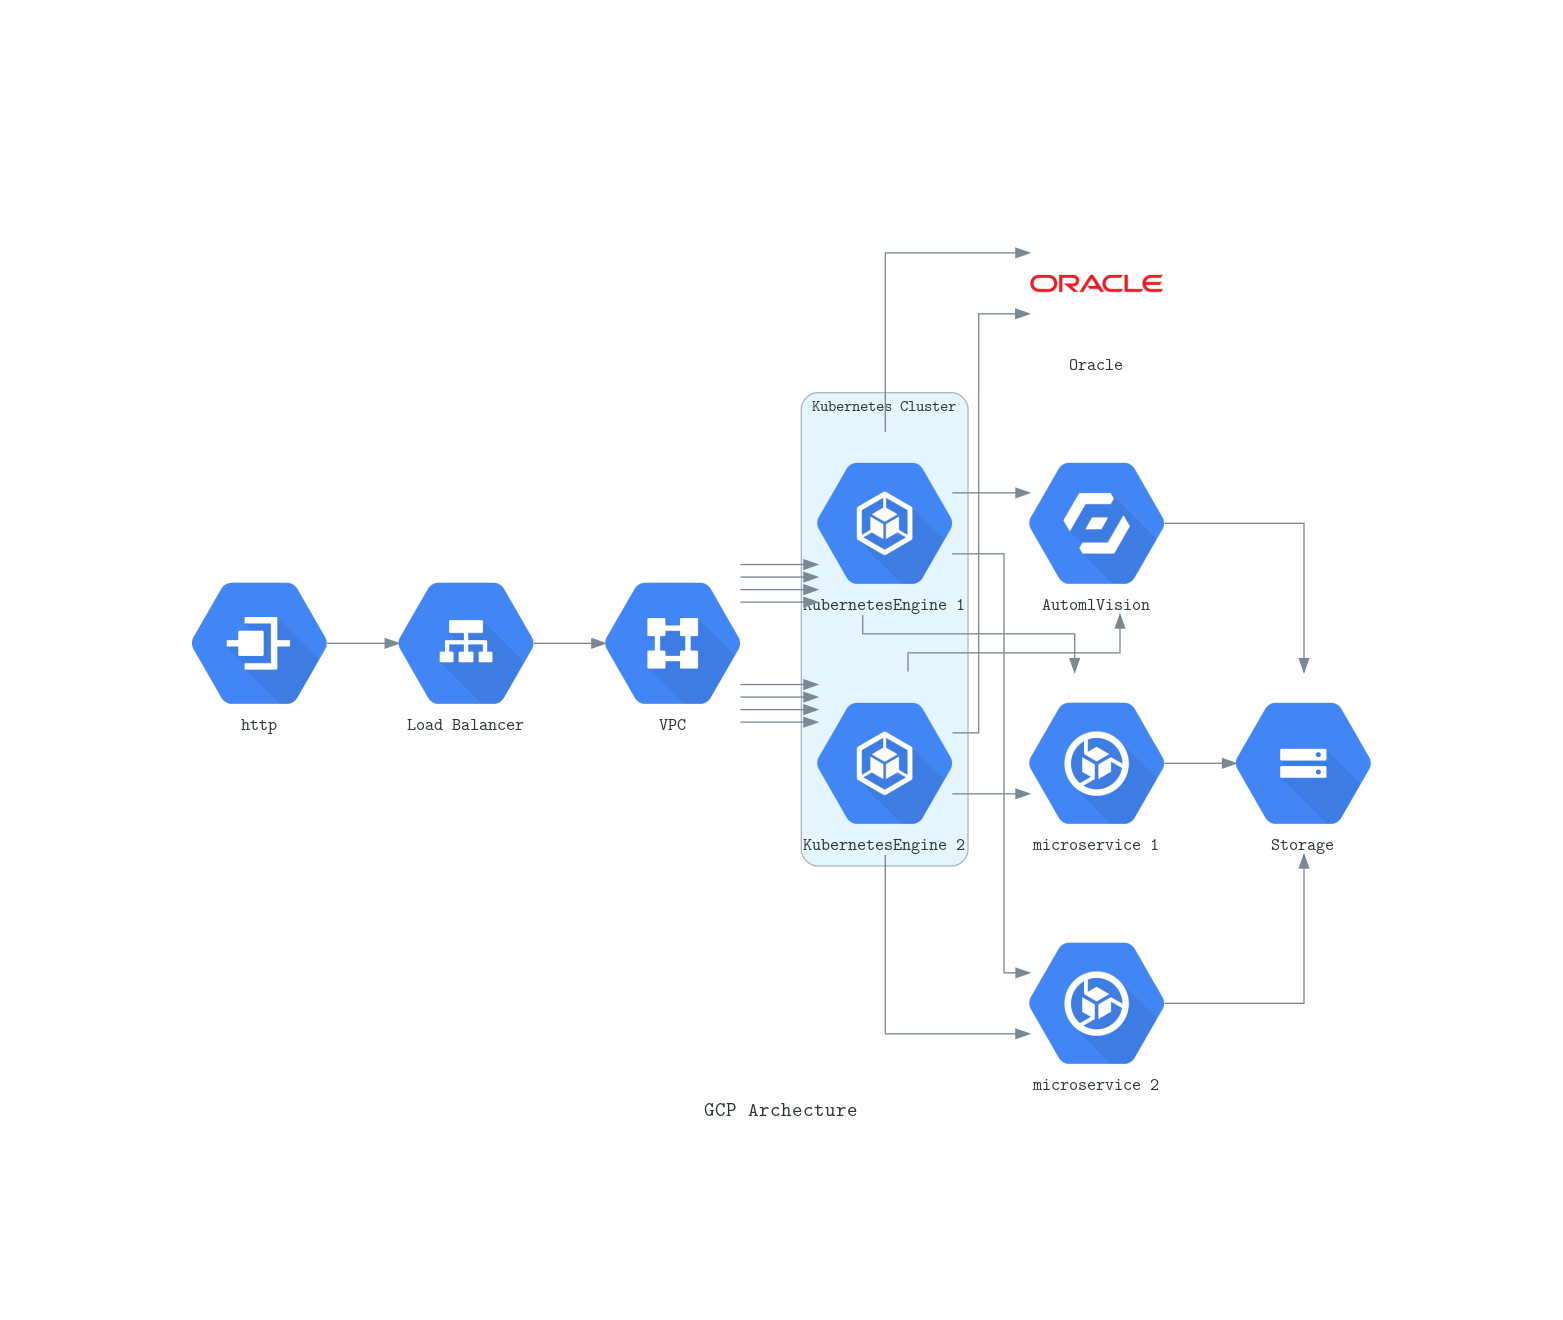

In [43]:
from diagrams import Diagram, Cluster
from diagrams.onprem.database import Oracle
from diagrams.gcp.network import DedicatedInterconnect
from diagrams.gcp.network import LoadBalancing
from diagrams.gcp.compute import ContainerOptimizedOS
from diagrams.gcp.ml import AutomlVision
from diagrams.gcp.network import VirtualPrivateCloud
from diagrams.gcp.storage import Storage
from diagrams.gcp.compute import KubernetesEngine

with Diagram("GCP Archecture", direction='LR') as diag: 
    dns = DedicatedInterconnect("http")
    load_balancer = LoadBalancing("Load Balancer")
    vpc = VirtualPrivateCloud("VPC")
    database = Oracle("Oracle")
    lambda1 = ContainerOptimizedOS("microservice 1")
    lambda2 = ContainerOptimizedOS("microservice 2")
    ml = AutomlVision("AutomlVision")
    storage = Storage("Storage")
    with Cluster("Kubernetes Cluster"):
        svc_group = [KubernetesEngine("KubernetesEngine 1"),
                    KubernetesEngine("KubernetesEngine 2")]
    dns >> load_balancer >> vpc
    vpc >> svc_group >> database
    vpc >> svc_group >> lambda1
    lambda1 >> storage
    vpc >> svc_group >> lambda2
    lambda2 >> storage
    vpc >> svc_group >> ml
    ml >> storage
diag